# Continuous Probabilistic Methods Exercises
***

### 1. Using lemonade.csv dataset and focusing on continuous variables:

- a.)  Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- b.) Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
- c.) Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?
- d.) Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

#Import custom functions
import continuous_probabilistic_methods as cpm

In [2]:
#Read lemonade data from .csv (link in class notebook) 

df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
df.Temperature.quantile(0.25)


49.7

In [6]:
# Using multiplier of 1.5, look for outliers

for col in df[['Temperature','Rainfall','Flyers','Price','Sales']]:
    
    mult, lower, upper = cpm.get_lower_and_upper_bounds(df[col])
    
    print(col,"Outliers with Multiplier: ",  mult,  "\n","Lower Bounds: ", lower, "Upper Bounds", upper, "\n")
    print( df[(df[col] < lower) | (df[col] > upper)])
    print('\n')

Temperature Outliers with Multiplier:  1.5 
 Lower Bounds:  16.700000000000003 Upper Bounds 104.7 

         Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41    2/11/17  Saturday        212.0      0.91      35    0.5     21
364  12/31/17    Sunday         15.1      2.50       9    0.5      7


Rainfall Outliers with Multiplier:  1.5 
 Lower Bounds:  0.26 Upper Bounds 1.3 

         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33   

In [7]:
# Looking for outliers with a mutliplier of 3

for col in df[['Temperature','Rainfall','Flyers','Price','Sales']]:
    
    mult, lower, upper = cpm.get_lower_and_upper_bounds(df[col],3)
    
    print(col,"Outliers with Multiplier: ",  mult,  "\n","Lower Bounds: ", lower, "Upper Bounds", upper, "\n")
    print( df[(df[col] < lower) | (df[col] > upper)].to_markdown())
    print('\n')

Temperature Outliers with Multiplier:  3 
 Lower Bounds:  -16.299999999999997 Upper Bounds 137.7 

|    | Date    | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|---:|:--------|:---------|--------------:|-----------:|---------:|--------:|--------:|
| 41 | 2/11/17 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 |


Rainfall Outliers with Multiplier:  3 
 Lower Bounds:  -0.13 Upper Bounds 1.69 

|     | Date     | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|----:|:---------|:--------|--------------:|-----------:|---------:|--------:|--------:|
|   0 | 1/1/17   | Sunday  |          27   |       2    |       15 |     0.5 |      10 |
| 338 | 12/5/17  | Tuesday |          22   |       1.82 |       11 |     0.5 |      10 |
| 343 | 12/10/17 | Sunday  |          31.3 |       1.82 |       15 |     0.5 |      11 |
| 364 | 12/31/17 | Sunday  |          15.1 |       2.5  |        9 |     0.5 |       7 |


Flyers Outliers wi

In [8]:
# Some of these outliers do not make sense like the Temperature of 212 or the Flyers of -38.  
# And some, while deviating from the norm, may be valid like the Temperature of 15.1 on 
# December 31 or the sales of 143 in July and 534 on July 4th.  
# Those may be kept and investigated more closely.

### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?

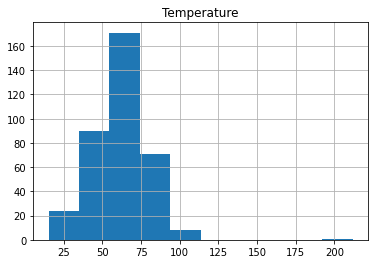

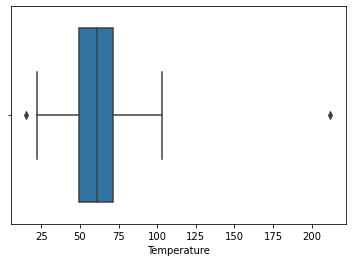

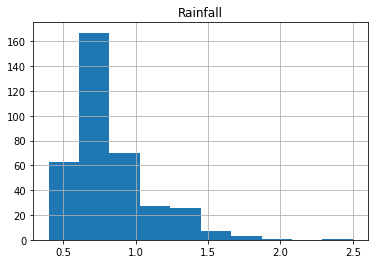

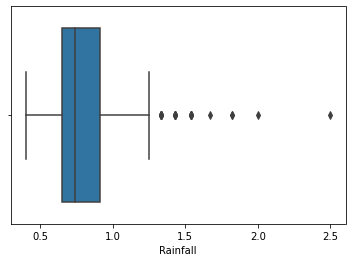

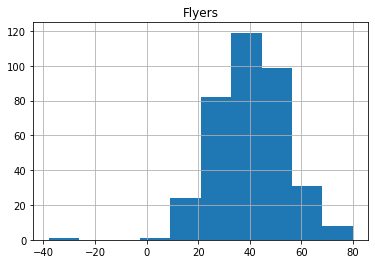

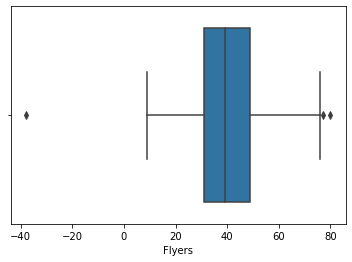

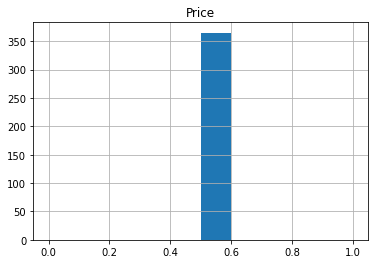

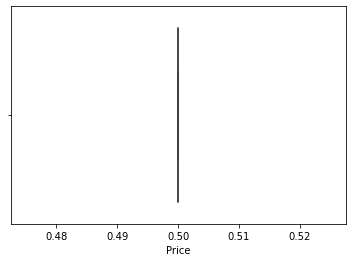

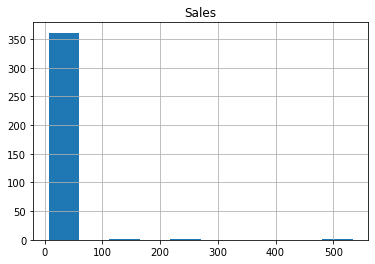

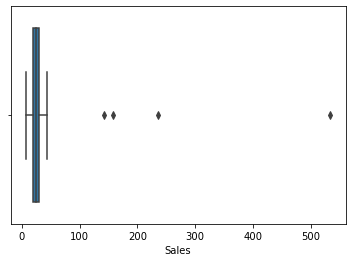

In [9]:
# iterate through columns
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()

In [10]:
# Looks like only temperature, rainfall, and flyers are normally distributed

In [11]:
#Checking for outliers using 2 sigma decision rule
for col in df[['Temperature','Rainfall','Flyers']]:
    
    
    # Calculate the z-score 
    zscores = pd.Series((df[col] - df[col].mean()) / df[col].std())
    
    # Finds all of the observations two standard deviations or more.
    print(col,"Outliers with Abs(sigma) >= 2","\n")
    print( df[zscores.abs() >= 2].to_markdown())
    print('\n') 

Temperature Outliers with Abs(sigma) >= 2 

|     | Date     | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|----:|:---------|:---------|--------------:|-----------:|---------:|--------:|--------:|
|  41 | 2/11/17  | Saturday |         212   |       0.91 |       35 |     0.5 |      21 |
| 166 | 6/16/17  | Friday   |          99.3 |       0.47 |       77 |     0.5 |      41 |
| 176 | 6/26/17  | Monday   |         102.6 |       0.47 |       60 |     0.5 |      42 |
| 181 | 7/1/17   | Saturday |         102.9 |       0.47 |       59 |     0.5 |     143 |
| 190 | 7/10/17  | Monday   |          98   |       0.49 |       66 |     0.5 |      40 |
| 198 | 7/18/17  | Tuesday  |          99.3 |       0.47 |       76 |     0.5 |      41 |
| 202 | 7/22/17  | Saturday |          99.6 |       0.47 |       49 |     0.5 |      42 |
| 207 | 7/27/17  | Thursday |          97.9 |       0.47 |       74 |     0.5 |      43 |
| 338 | 12/5/17  | Tuesday  |          22   |       1.82

- Looks like most of these should be kept except for some that are the same obvious outliers as before.
- The temperature outliers all make sense because the more extreme temps correspond with their season.
-  The rainfall outliers all seem to be around the same range and are mostly in the winter months where snow may account for some.
-  The flyers outliers seem reasonable to be kept as they're within range of each other except for the negative value an two in December, but one is on NYE, a holiday, so makes sense.


#### Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv


In [12]:
#Checking for outliers using 2 sigma decision rule
for col in df[['Temperature','Rainfall','Flyers']]:
    
    
    # Calculate the z-score 
    zscores = pd.Series((df[col] - df[col].mean()) / df[col].std())
    
    # Finds all of the observations two standard deviations or more.
    print(col,"Outliers with Abs(sigma) >= 3","\n")
    print( df[zscores.abs() >= 2].to_markdown())
    print('\n') 

Temperature Outliers with Abs(sigma) >= 3 

|     | Date     | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|----:|:---------|:---------|--------------:|-----------:|---------:|--------:|--------:|
|  41 | 2/11/17  | Saturday |         212   |       0.91 |       35 |     0.5 |      21 |
| 166 | 6/16/17  | Friday   |          99.3 |       0.47 |       77 |     0.5 |      41 |
| 176 | 6/26/17  | Monday   |         102.6 |       0.47 |       60 |     0.5 |      42 |
| 181 | 7/1/17   | Saturday |         102.9 |       0.47 |       59 |     0.5 |     143 |
| 190 | 7/10/17  | Monday   |          98   |       0.49 |       66 |     0.5 |      40 |
| 198 | 7/18/17  | Tuesday  |          99.3 |       0.47 |       76 |     0.5 |      41 |
| 202 | 7/22/17  | Saturday |          99.6 |       0.47 |       49 |     0.5 |      42 |
| 207 | 7/27/17  | Thursday |          97.9 |       0.47 |       74 |     0.5 |      43 |
| 338 | 12/5/17  | Tuesday  |          22   |       1.82

- Eliminated more outliers than the 2 sigma